# **Covid-19- Analysis,Visualization and Comparaisons**


---


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/BDA Mini Project/Dataset/covid_19_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


In [ ]:
NAN = [(c, data[c].isna().mean()*100) for c in data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

column_name  percentage
0              SNo    0.000000
1  ObservationDate    0.000000
2   Province/State   30.266684
3   Country/Region    0.000000
4      Last Update    0.000000
5        Confirmed    0.000000
6           Deaths    0.000000
7        Recovered    0.000000

In [ ]:
data["Province/State"]= data["Province/State"].fillna('Unknown')
data.head()

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01/22/2020          Anhui  ...       1.0    0.0        0.0
1    2      01/22/2020        Beijing  ...      14.0    0.0        0.0
2    3      01/22/2020      Chongqing  ...       6.0    0.0        0.0
3    4      01/22/2020         Fujian  ...       1.0    0.0        0.0
4    5      01/22/2020          Gansu  ...       0.0    0.0        0.0

[5 rows x 8 columns]

In [ ]:
data[["Confirmed","Deaths","Recovered"]] =data[["Confirmed","Deaths","Recovered"]].astype(int)
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')
data['Active_case'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

SNo ObservationDate Province/State  ... Deaths Recovered  Active_case
0    1      01/22/2020          Anhui  ...      0         0            1
1    2      01/22/2020        Beijing  ...      0         0           14
2    3      01/22/2020      Chongqing  ...      0         0            6
3    4      01/22/2020         Fujian  ...      0         0            1
4    5      01/22/2020          Gansu  ...      0         0            0

[5 rows x 9 columns]

In [ ]:
Data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()

In [ ]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

## Covid-19 In the world

In [ ]:
labels = ["Last Update","Confirmed","Active cases","Recovered","Deaths"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                 cells=dict(values=Data_world.loc[0,["ObservationDate","Confirmed","Active_case","Recovered","Deaths"]]))
                     ])
fig.update_layout(
    title='Coronavirus in the world : ',
)
fig.show()

In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
fig = px.pie(Data_world, values=values, names=labels,color_discrete_sequence=['rgb(77,146,33)','rgb(69,144,185)','rgb(77,77,77)'],hole=0.7)
fig.update_layout(
    title='Total cases : '+str(Data_world["Confirmed"][0]),
)
fig.show()

### Evolution of Confirmed cases over time in the word

In [ ]:
data_over_time= data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in the word',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

### Evolution of Active cases over time in the world

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Active_case'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Active cases over time in the world',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Days",
)
fig.show()

### Evolution of Recovered cases over time in the world

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))

fig.update_layout(
    title='Evolution of Recovered cases over time in the world',
        template='plotly_white',
      yaxis_title="Recovered cases",
    xaxis_title="Days",

)

fig.show()

### Evolution of Deaths over time in the world

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in the world',
        template='plotly_white',
     yaxis_title="Deaths",
    xaxis_title="Days",

)

fig.show()

### Confirmed Cases In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Confirmed'],
           ))
fig.update_layout(
    title='Confirmed Cases In Each Day',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Days",
)
fig.show()

### Active Cases In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Active_case'],
    marker_color='rgb(253,187,132)'
           ))
fig.update_layout(
    title='Active Cases In Each Day',
    template='plotly_dark',
     xaxis_title="Active Cases",
    yaxis_title="Days",
)
fig.show()

### Recovered Cases In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Recovered'],
    marker_color='rgb(178,24,43)'
           ))
fig.update_layout(
    title='Recovered Cases In Each Day',
    template='plotly_white',
     xaxis_title="Recovered Cases",
    yaxis_title="Days",
)
fig.show()

### Deaths In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=data_over_time['ObservationDate'],
            y=data_over_time['Deaths'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Deaths In Each Day',
    template='plotly_white',
     xaxis_title="Deaths",
    yaxis_title="Days",
)
fig.show()

## Confirmed cases in each Country



In [ ]:
Data_per_country = Data.groupby(["Country/Region"])["Confirmed","Active_case","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Country</b>','<b>Confirmed Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
      
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Data_per_country['Country/Region'],
      Data_per_country['Confirmed'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(Data_per_country)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 10)
    ))
])
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

### Confirmed Cases In Each Country

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Confirmed'],
            y=Data_per_country['Country/Region'],
            orientation='h'))
fig.update_layout(
    title='Confirmed Cases In Each Country',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Countries",
)
fig.show()

### Active Cases In Each Country

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Active_case'],
            y=Data_per_country['Country/Region'],
            orientation='h',
            marker_color='#DC3912',))
fig.update_layout(
    title='Active Cases In Each Country',
    template='plotly_white',
    xaxis_title="Active Cases",
    yaxis_title="Countries",
)
fig.show()


### Recovered Cases In Each Country

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Recovered'],
            y=Data_per_country['Country/Region'],
            orientation='h',
            marker_color='#2CA02C',))
fig.update_layout(
    title='Recovered Cases In Each Country',
    template='plotly_white',
     xaxis_title="Recovered Cases",
    yaxis_title="Countries",
)
fig.show()

### Deaths In Each Country

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_per_country['Deaths'],
            y=Data_per_country['Country/Region'],
            orientation='h',
            marker_color='black',))
fig.update_layout(
    title='Deaths In Each Country',
    template='plotly_white',
    xaxis_title="Deaths",
    yaxis_title="Countries",
)

fig.show()

### Confirmed Cases In Each Country

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Confirmed'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

### Active Cases In Each Country

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Active_case'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(
    title='Active Cases In Each Country',
)
fig.show()

### Recovered Cases In Each Country

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Recovered'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(
    title='Recovered Cases In Each Country',
)
fig.show()

### Deaths In Each Country

In [ ]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Deaths'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Deaths In Each Country',
)
fig.show()

## Evolution of coronavirus over time

In [ ]:
data_per_country = data.groupby(["Country/Region","ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)

### Evolution of confirmed cases In Each Country

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Confirmed'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.deep,
                    animation_frame="ObservationDate")
fig.update_layout(

    title='Evolution of confirmed cases In Each Country',
)
fig.show()

### Evolution of active cases In Each Country

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Active_case'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,
                    animation_frame="ObservationDate")
fig.update_layout(

    title='Evolution of active cases In Each Country',
    template='plotly_dark'
)
fig.show()

### Evolution of recovered cases In Each Country

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Recovered'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.deep,
                    animation_frame="ObservationDate")
fig.update_layout(
    title='Evolution of recovered cases In Each Country',
)
fig.show()

### Evolution of deaths In Each Country

In [ ]:
fig = px.choropleth(data_per_country, locations=data_per_country['Country/Region'],
                    color=data_per_country['Deaths'],locationmode='country names', 
                    hover_name=data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,
                    animation_frame="ObservationDate")
fig.update_layout(
    title='Evolution of deaths In Each Country',
    template='plotly_dark'
)
fig.show()

### Most 10 infected Countries

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Data_per_country['Country/Region'][0:10],
    y=Data_per_country['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(Data_per_country['Confirmed'][0:10]/25000),
        showscale=True
        )
)])

fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

## Recovered Cases In Each Country

In [ ]:
Recovered_per_country = Data.groupby(["Country/Region"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [ ]:
fig = px.pie(Recovered_per_country, values=Recovered_per_country['Recovered'], names=Recovered_per_country['Country/Region'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_white'
)
fig.show()

### Most 10 infected Countries

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Recovered_per_country['Country/Region'][0:10],
    y=Recovered_per_country['Recovered'][0:10],
    mode='markers',
    marker=dict(
        color=100+np.random.randn(500),
        size=(Data_per_country['Recovered'][0:10]/20000),
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
    template='plotly_white'

)
fig.show()

## Active cases in each Country


In [ ]:
Active_per_country = Data.groupby(["Country/Region"])["Active_case"].sum().reset_index().sort_values("Active_case",ascending=False).reset_index(drop=True)

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Active_per_country['Country/Region'][0:10],
    y=Active_per_country['Active_case'][0:10],
    mode='markers',
    marker=dict(
        color=10+np.random.randn(200),

        size=Active_per_country['Active_case'][0:10]/15000,
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Active Cases",
        template='plotly_white'

)
fig.show()

## Deaths cases in each Country

In [ ]:
Deaths_per_country = Data.groupby(["Country/Region"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=Deaths_per_country['Country/Region'][0:10],
    y=Deaths_per_country['Deaths'][0:10],
    mode='markers',
    marker=dict(
        color=[145, 140, 135, 130, 125, 120,115,110,105,100],
        size=Deaths_per_country['Deaths'][0:10]/1000,
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Deaths",
        template='plotly_white'

)
fig.show()

---
## COVID-19 in India

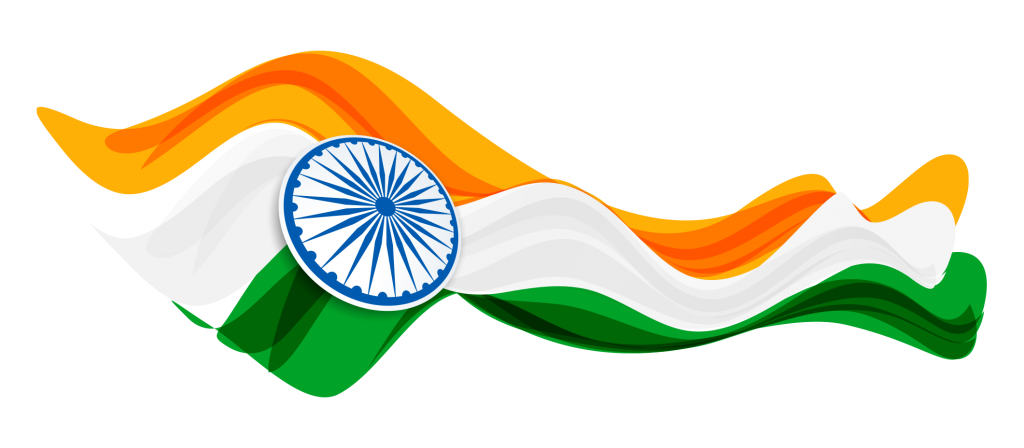

In [ ]:
Data_india = data [(data['Country/Region'] == 'India') ].reset_index(drop=True)
Data_india.head()

SNo ObservationDate Province/State  ... Deaths Recovered  Active_case
0  431      01/30/2020        Unknown  ...      0         0            1
1  492      01/31/2020        Unknown  ...      0         0            1
2  548      02/01/2020        Unknown  ...      0         0            1
3  608      02/02/2020        Unknown  ...      0         0            2
4  673      02/03/2020        Unknown  ...      0         0            3

[5 rows x 9 columns]

### Evolution of cases over time in India

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_india['ObservationDate'], y=Data_india['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_india['ObservationDate'], y=Data_india['Active_case'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_india['ObservationDate'], y=Data_india['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_india['ObservationDate'], y=Data_india['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in India',
        template='plotly_white'
)
fig.show()

### Confirmed cases In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_india['ObservationDate'],
            y=Data_india['Confirmed'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Confirmed cases In Each Day',
    template='plotly_white',
     xaxis_title="Confirmed cases",
    yaxis_title="Days",
)
fig.show()

### Active cases In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_india['ObservationDate'],
            y=Data_india['Active_case'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Active cases In Each Day',
    template='plotly_white',
     xaxis_title="Active cases",
    yaxis_title="Days",
)
fig.show()

### Recovered cases In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_india['ObservationDate'],
            y=Data_india['Recovered'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Recovered cases In Each Day',
    template='plotly_white',
     xaxis_title="Recovered cases",
    yaxis_title="Days",
)
fig.show()

### Deaths In Each Day

In [ ]:
fig = go.Figure(go.Bar(
            x=Data_india['ObservationDate'],
            y=Data_india['Deaths'],
    marker_color='rgb(13,48,100)'
           ))
fig.update_layout(
    title='Deaths In Each Day',
    template='plotly_white',
     xaxis_title="Deaths",
    yaxis_title="Days",
)
fig.show()

### Get Last Update

In [ ]:
Data_india_last = Data_india[Data_india['ObservationDate'] == max(Data_india['ObservationDate'])].reset_index()
Data_india_last


index     SNo ObservationDate  ... Deaths Recovered Active_case
0    3969  116250      09/23/2020  ...     52      3479         160
1    3970  116251      09/23/2020  ...   5461    562376       71465
2    3971  116267      09/23/2020  ...     14      5778        2052
3    3972  116268      09/23/2020  ...    586    130950       29857
4    3973  116290      09/23/2020  ...    873    157454       12928
5    3974  116323      09/23/2020  ...    130      7794        2622
6    3975  116330      09/23/2020  ...    718     52001       38198
7    3976  116349      09/23/2020  ...      2      2744         198
8    3977  116353      09/23/2020  ...   5051    216401       31623
9    3978  116387      09/23/2020  ...    368     23462        5513
10   3979  116403      09/23/2020  ...   3352    106285       16370
11   3980  116408      09/23/2020  ...   1206     93776       19888
12   3981  116415      09/23/2020  ...    134      8511        4124
13   3982  116441      09/23/2020  ...   1042     43734       21485
14   3983  116444      09/23/2020  ...    641     60027       13280
15   3984  116462      09/23/2020  ...   8228    432450       93172
16   3985  116465      09/23/2020  ...    572    101731       40453
17   3986  116490      09/23/2020  ...     50      2809        1028
18   3987  116491      09/23/2020  ...      0         0           0
19   3988  116508      09/23/2020  ...   2035     86030       22646
20   3989  116514      09/23/2020  ...  33407    936554      272809
21   3990  116516      09/23/2020  ...     60      6887        2333
22   3991  116529      09/23/2020  ...     38      2706        2047
23   3992  116543      09/23/2020  ...      0      1023         690
24   3993  116555      09/23/2020  ...     15      4517        1072
25   3994  116597      09/23/2020  ...    721    153213       34377
26   3995  116631      09/23/2020  ...    473     18454        4757
27   3996  116635      09/23/2020  ...   2926     77127       21288
28   3997  116645      09/23/2020  ...   1367     98812       18614
29   3998  116692      09/23/2020  ...     29      2009         556
30   3999  116713      09/23/2020  ...   8947    497377       46350
31   4000  116717      09/23/2020  ...   1062    146135       29873
32   4001  116734      09/23/2020  ...    253     16486        6599
33   4002  116748      09/23/2020  ...      0         0           0
34   4003  116757      09/23/2020  ...   5212    296183       63148
35   4004  116758      09/23/2020  ...    512     30308       11831
36   4005  116784      09/23/2020  ...   4483    202030       24971

[37 rows x 10 columns]

In [ ]:
colors = ['rgb(54,26,233)','rgb(15,232,93)', 'rgb(233,26,26)']
labels = ["Active cases","Recovered","Deaths"]
values = Data_india_last.loc[0, ["Active_case","Recovered","Deaths"]]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
Data_india_per_state = Data_india_last.groupby(["Province/State"])["Confirmed", "Active_case", "Recovered", "Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
fig = px.pie(Data_india_per_state, values=Data_india_per_state['Confirmed'], names=Data_india_per_state['Province/State'],
             title='Confirmed cases in India',
            hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
